In [105]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
import nbdev
import cv2
from sklearn.model_selection import train_test_split

In [106]:
data = pd.read_csv('dataset.csv')
data

,label,image
0,0,D:\prg\dataset\result\0\1-frame.png
1,0,D:\prg\dataset\result\0\10-frame.png
2,0,D:\prg\dataset\result\0\100-frame.png
3,0,D:\prg\dataset\result\0\101-frame.png
4,0,D:\prg\dataset\result\0\102-frame.png
...,...,...
8384,9,D:\prg\dataset\result\9\7028-frame.png
8385,9,D:\prg\dataset\result\9\7029-frame.png
8386,9,D:\prg\dataset\result\9\7030-frame.png
8387,9,D:\prg\dataset\result\9\7031-frame.png


<function matplotlib.pyplot.show(close=None, block=None)>

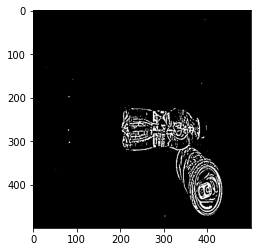

In [107]:
img = cv2.imread(data.values[:,1][3475], cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.cm.binary)
plt.show

In [108]:
x,y = np.array([np.array(cv2.imread(path, cv2.IMREAD_GRAYSCALE),dtype=bool) for path in data.values[:,1]]), data.values[:,0]

In [109]:
y = np_utils.to_categorical(y, 13)

In [110]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [111]:
x_train = np.expand_dims(x_train, axis=3)
x_val = np.expand_dims(x_val, axis=3)

In [120]:
model = keras.Sequential([
    Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', input_shape=(500,500,1)),
    MaxPooling2D((4,4), strides = 4),
    Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'),
    MaxPooling2D((2,2), strides = 2),
    MaxPooling2D((2,2), strides = 2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(13, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 498, 498, 16)      160       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 122, 122, 32)      4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 28800)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)              

In [121]:
model.fit(x_train, y_train, batch_size=32, verbose=True, epochs=5, validation_data = (x_val, y_val))

Epoch 1/5
210/210 [==============================] - 436s 2s/step - loss: 0.3365 - accuracy: 0.9037 - val_loss: 0.0620 - val_accuracy: 0.9797
Epoch 2/5
210/210 [==============================] - 550s 3s/step - loss: 0.0460 - accuracy: 0.9899 - val_loss: 0.0476 - val_accuracy: 0.9905
Epoch 3/5
210/210 [==============================] - 553s 3s/step - loss: 0.0340 - accuracy: 0.9917 - val_loss: 0.0574 - val_accuracy: 0.9785
Epoch 4/5
210/210 [==============================] - 562s 3s/step - loss: 0.0288 - accuracy: 0.9927 - val_loss: 0.0458 - val_accuracy: 0.9893
Epoch 5/5
210/210 [==============================] - 467s 2s/step - loss: 0.0215 - accuracy: 0.9948 - val_loss: 0.0209 - val_accuracy: 0.9923


In [123]:
history = _

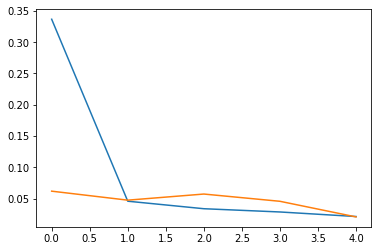

In [126]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [137]:
model.save('my_model.h5')

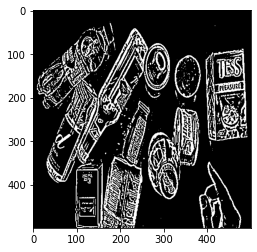

In [153]:
png = np.array((cv2.imread("imgs/5.png", cv2.IMREAD_GRAYSCALE)), dtype=bool)
plt.imshow(png, cmap = plt.cm.binary)
plt.show()

In [154]:
png = np.expand_dims(png, axis=2)
png = np.expand_dims(png,axis=0)
png.shape

In [156]:
res = model.predict(png)
print(res)
print(np.argmax(res))

[[8.65673669e-19 3.81165233e-13 1.78315910e-04 1.29807219e-07
  2.67787372e-11 9.75012355e-08 3.28223742e-08 2.12846043e-08
  9.11846996e-07 3.09865982e-07 1.13708204e-07 9.99820173e-01
  4.21916113e-10]]
11
